# MNIST

the "hello world" of Machine Learning

In [ ]:
# scikit has helpers to fetch popular datasets
from sklearn.datasets import fetch_openml
#  Datasets from OpenML.
mnist = fetch_openml("mnist_784",version=1)
mnist.keys()

In [22]:
X, y = mnist['data'], mnist['target']
X = X.to_numpy(); y = y.to_numpy()
print(X.shape)
print(y.shape)

import numpy as np

(70000, 784)
(70000,)


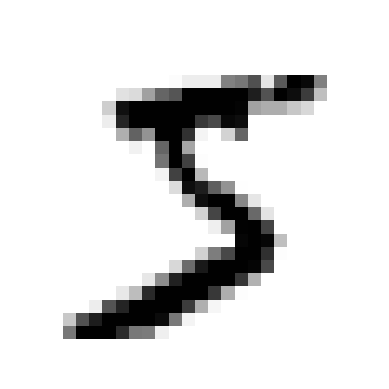

In [26]:
import matplotlib.pyplot as plt

def show_digit(some_digit: np.ndarray = X[0]):
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.show()
    return

show_digit()

In [28]:
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

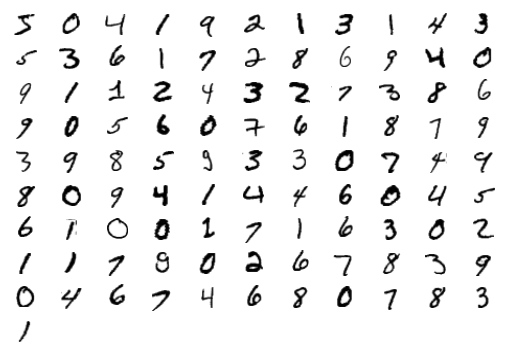

In [41]:
def show_digits(digits: np.ndarray = X[:100]):
    m: int = len(digits)
    edge: int = int(np.sqrt(m)) + 1
    for i in range(m):
        plt.subplot(edge,edge,i+1)
        plt.imshow(digits[i].reshape(28,28),cmap="binary")
        plt.axis("off")
    plt.show()
    return

some_digit: np.ndarray = X[0]
show_digits()


In [32]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

In [34]:
# 5-detector
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
#  Labels of True and False.

In [35]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [38]:
sgd_clf.predict([X_train[0]])

array([ True])

In [40]:
y_train_5[0]

True

# Performance Measures

## Measuring Acuracy Using Cross-Validation

In [45]:
# Do some DIY - Stratified CV (K-Fold Validation)
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

from typing import List
def strat_cv(clf, X: np.ndarray, y: np.ndarray, cv=3):
    """
    Scoring="Accuracy".
    """
    results: List[float] = []
    skfold = StratifiedKFold(n_splits=cv, random_state=42, shuffle=True)

    for train_index, test_index in skfold.split(X, y):
        clone_clf = clone(clf)
        X_train_folds = X[train_index]
        y_train_folds = y[train_index]
        X_test_fold = X[test_index]
        y_test_fold = y[test_index]

        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        n_correct = sum(y_pred == y_test_fold)
        results.append(n_correct / len(y_pred))
    return results

strat_cv(sgd_clf, X_train, y_train_5)

[0.9669, 0.91625, 0.96785]

In [46]:
# cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [49]:
# A Never5Classifier
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros(len(X), dtype=bool)

In [50]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix

In [51]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [52]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
#  Each row: actual class;
#  each column: predicted class.

array([[53892,   687],
       [ 1891,  3530]])

In [55]:
# Perfect predictions
for y_train_perfect_predictions in (y_train_5,):
    print(confusion_matrix(y_train_5, y_train_perfect_predictions))

[[54579     0]
 [    0  5421]]


### Precision and Recall

In [57]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
print('Precision:', precision_score(y_train_5, y_train_pred))
print("Recall:", recall_score(y_train_5, y_train_pred))


Precision: 0.8370879772350012
Recall: 0.6511713705958311


In [58]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846